# Diagnostic Curves

In this notebook will be some additional problems regarding the $k$-nearest neighbors classifier. This material corresponds to `Lectures/Supervised Learning/Classification/5. Diagnostic Curves`.

In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

##### 1. Cancer ROC curve

Build a logistic regression classifier on the Wisconsin cancer data set in `sklearn`.

Create a validation set then plot the ROC curve for this classifier on that set. Use this, and any other plots you would like, to choose a probability cutoff for the classifier.

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [3]:
cancer = load_breast_cancer()

X = cancer['data']
y = cancer['target']

## Changing labels so 
## 1 is malignant and
## 0 is benign
y = -y + 1

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                       shuffle = True,
                                                       random_state = 232,
                                                       test_size=.2,
                                                       stratify = y)

##### Sample Solution

In [5]:
X_tt, X_val, y_tt, y_val = train_test_split(X_train, y_train,
                                               shuffle = True,
                                               random_state = 232,
                                               test_size=.2,
                                               stratify=y_train)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [7]:
scale = StandardScaler()
X_tt_scaled = scale.fit_transform(X_tt)

log_reg = LogisticRegression()

log_reg.fit(X_tt_scaled, y_tt)

val_pred_prob = log_reg.predict_proba(scale.transform(X_val))[:,1]

In [8]:
tprs = []
fprs = []

for p in np.arange(0,1.05, .05):
    val_pred = 1*(val_pred_prob >= p)
    
    conf_mat = confusion_matrix(y_val, val_pred)
    
    tprs.append(conf_mat[1,1]/(conf_mat[1,0] + conf_mat[1,1]))
    fprs.append(conf_mat[0,1]/(conf_mat[0,0] + conf_mat[0,1]))

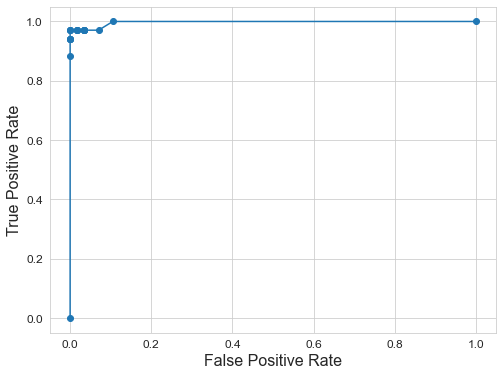

In [9]:
plt.figure(figsize=(8,6))

plt.plot(fprs, tprs, 'o-')

plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()

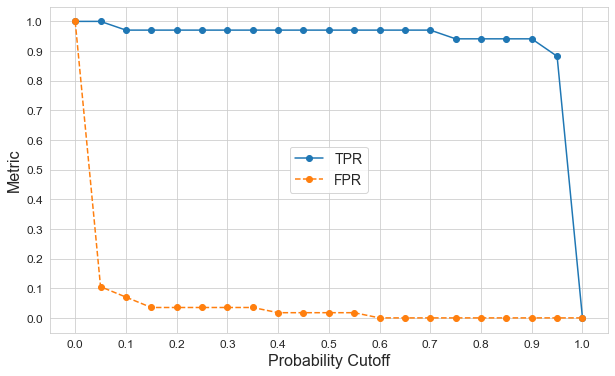

In [10]:
plt.figure(figsize=(10,6))


plt.plot(np.arange(0,1.05, .05), tprs, 'o-', label="TPR")
plt.plot(np.arange(0,1.05, .05), fprs, 'o--', label="FPR")

plt.xlabel("Probability Cutoff",fontsize=16)

plt.ylabel("Metric",fontsize=16)

plt.xticks(np.arange(0,1.1,.1),fontsize=12)
plt.yticks(np.arange(0,1.1,.1),fontsize=12)

plt.legend(fontsize=14)

plt.show()

Anywhere from $0.2$ to $0.4$ seems reasonable to me.

##### 2. Cancer Gains/Lift Curve

<i>Note that this question is a hypothetical exercise and not any kind of endorsement to this approach to health care</i>.

Imagine that you work for a clinic looking to provide underserved populations with free healthcare. This clinic has the resources to provide free breast cancer treatment to $x\%$ of its care population. Ideally, they would like to target this care according to those whose scans indicate they most likely need it. A gains and lift chart could help clinic managers see estimates of the percent of those who need care who would receive it if they provided care to individuals with the highest probability of malignant tumors.


Using the logistic regression model you fit above, produce a gains and lift chart for this classifier using the validation set.

##### Sample Solution

In [11]:
pred_df = pd.DataFrame({'actual':y_val,
                           'prob':val_pred_prob})

In [12]:
ps = [pred_df.prob.quantile(i) for i in np.arange(1, 0, -0.01)]

In [13]:
from sklearn.metrics import recall_score

In [14]:
tprs = []
lifts = []


for i,p in enumerate(ps):
    pred = 1*(pred_df.prob.values >= p)
    
    ## using the fact the tpr is recall
    tprs.append(recall_score(pred_df.actual.values, pred))
    
## as well as the lift_scores
lifts = [tprs[i]/np.arange(.01,1.01,.01)[i] for i in range(100)]

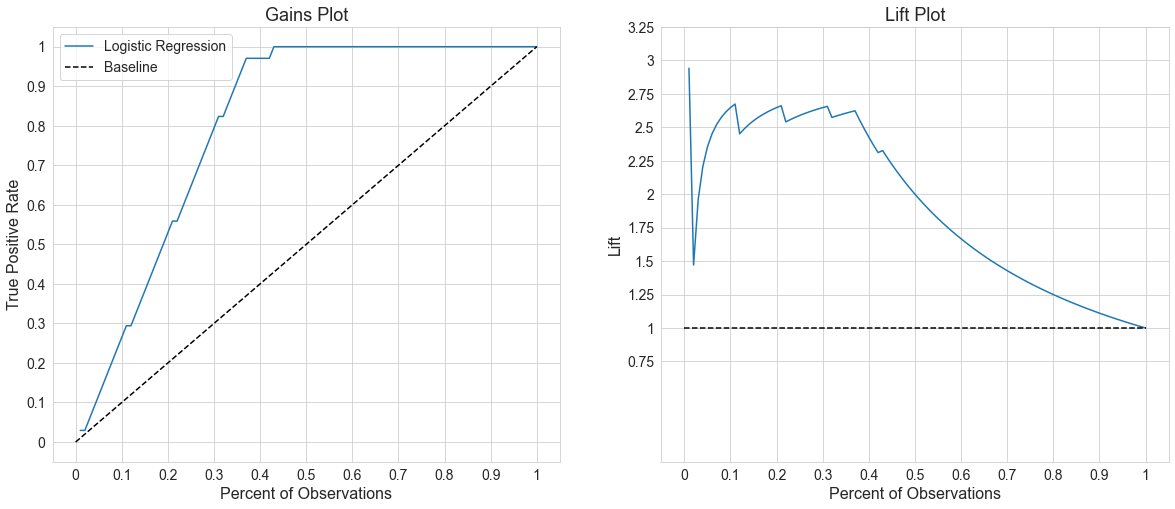

In [15]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

ax[0].plot(np.arange(0.01,1.01,0.01), tprs, label="Logistic Regression")
ax[0].plot([0,1], [0,1], 'k--', label="Baseline")

ax[0].set_xlabel("Percent of Observations", fontsize=16)
ax[0].set_ylabel("True Positive Rate", fontsize=16)
ax[0].set_xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
ax[0].set_xticklabels([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], fontsize=14)
ax[0].set_yticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
ax[0].set_yticklabels([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], fontsize=14)
ax[0].set_title("Gains Plot", fontsize=18)
ax[0].legend(fontsize=14)

ax[1].plot(np.arange(0.01,1.01,0.01), lifts)
ax[1].plot([0,1],[1,1],'k--')
ax[1].set_ylim((0,2.25))

ax[1].set_xlabel("Percent of Observations", fontsize=16)
ax[1].set_ylabel("Lift", fontsize=16)
ax[1].set_xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1])
ax[1].set_xticklabels([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1], fontsize=14)
ax[1].set_yticks([.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25], fontsize=14)
ax[1].set_yticklabels([.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3,3.25], fontsize=14)
ax[1].set_title("Lift Plot", fontsize=18)

plt.show()

From these charts we can see that if the clinic has the resources to provide care to half of its patients than we we estimate that we should be able to provide care to all of the patients with malignant tumors.

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)